## Visualizing Tech Stocks

---

### A few notes on this project

If you're doing this on Codecademy, note that the project instructions are slightly outdated (at the time of writing.) There were two issues that I encountered:

1. Yahoo Finance recently [made changes to their API that broke the compatability](https://github.com/pydata/pandas-datareader/issues/952) with `pandas_datareader` module, and following the instructions to import the stock data with throw a `TypeError: string indices must be integers`. 
2. The stock ticker for Facebook was changed from `FB` to `META`. This is a minor issue, but you will get `NaN` in place of stock data if you try to use the `FB` ticker. Just use the `META` ticker instead!


For problem 1, a good temporary workaround is to use the `yfinance` module instead. You can install it with `pip install yfinance`, then import the module with `import yfinance as yfin` and then add the statement `yfin.pdr_override()` at the beginning of the script. You will then be able to use the `pandas_datareader` module and follow the project instructions without this particular error, and statements like `data_reader.get_data_yahoo('AAPL', start, end)` will work normally.

---

In this project you will analyze and visualize the top 5 highest valued technology stocks, as of the end of the first half of 2019:
* Microsoft (NASDAQ:MSFT)
* Amazon (NASDAQ:AMZN)
* Apple (NASDAQ:AAPL)
* Alphabet (NASDAQ:GOOG)
* Facebook (NASDAQ:FB).

Using Pandas, Pandas-Datarader, and Matplotlib, you will take a visual look into the similarities and differences between these stocks during the six month period from January through June 2019. In your analysis you will perform the following:
1. Visualize the stock prices using matplotlib
2. Calculate and visualize the daily simple rate of return 
3. Calculate and visualize the mean rates of return
4. Calculate and visualize the variances of the returns
5. Calculate and visualize the standard deviations of the returns
6. Write a short thesis based on the correlations between the tech stocks

### 1. Import Packages

#### Step 1: Import Data Manipulation Packages
Import the pandas and numpy module as `pd` and `np`, respectively

In [33]:
import pandas as pd
import numpy as np

#### Step 2: Import Financial Package
Import the pandas data reader module as `web`. (Ensure the module is installed with `pip install pandas-datareader` on the command line)

In [34]:
import pandas_datareader.data as web

#### Step 3: Import Visualization Package
Import the matplotlib `pyplot` module as `plt`. (Write `%matplotlib inline` below the import statement to allow your visualizations to appear beneath the code that generates them)

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load the adjusted closings for the top 5 tech stocks.

#### Step 1: Define Stocks
Create a list named `symbols` containing the symbols for the top 5 tech stocks.
#### Step 2: Create Dates
Create a datetime object representing January 1st, 2019 named `start_date` and a datetime object representing July 1st, 2019 named `end_date`.
#### Step 3: Retrieve Data
Call the function `web.get_data_yahoo()` with arguments `symbols`, `start_date` and `end_date` and save the result to `stock_data`.
#### Step 4: View Data
View both `stock_data` and `stock_data['Adj Close']`. What information is stored in these DataFrames?

In [36]:
import pandas_datareader.data as web
from datetime import datetime
import yfinance as yfin

yfin.pdr_override()

symbols = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT']
start_date = '2019-01-01'
end_date = '2019-07-01'

# Retrive the stock data (Note: Adjusted Close)
stock_data = web.get_data_yahoo(symbols, start='2019-01-01', end='2019-07-01')
print(stock_data.head())


[*********************100%***********************]  5 of 5 completed
            Adj Close                                                   Close  \
                 AAPL       AMZN       GOOG        META       MSFT       AAPL   
Date                                                                            
2019-01-02  38.047047  76.956497  52.292500  135.679993  96.632660  39.480000   
2019-01-03  34.257282  75.014000  50.803001  131.740005  93.077736  35.547501   
2019-01-04  35.719696  78.769501  53.535500  137.949997  97.406708  37.064999   
2019-01-07  35.640190  81.475502  53.419498  138.050003  97.530945  36.982498   
2019-01-08  36.319603  82.829002  53.813999  142.529999  98.238113  37.687500   

                                                          ...       Open  \
                 AMZN       GOOG        META        MSFT  ...       AAPL   
Date                                                      ...              
2019-01-02  76.956497  52.292500  135.679993  101.1200

In [37]:
print(stock_data['Adj Close'])

                 AAPL       AMZN       GOOG        META        MSFT
Date                                                               
2019-01-02  38.047047  76.956497  52.292500  135.679993   96.632660
2019-01-03  34.257282  75.014000  50.803001  131.740005   93.077736
2019-01-04  35.719696  78.769501  53.535500  137.949997   97.406708
2019-01-07  35.640190  81.475502  53.419498  138.050003   97.530945
2019-01-08  36.319603  82.829002  53.813999  142.529999   98.238113
...               ...        ...        ...         ...         ...
2019-06-24  48.233330  95.695000  55.776001  192.600006  132.717590
2019-06-25  47.502224  93.913498  54.317501  188.839996  128.527420
2019-06-26  48.529648  94.891502  53.990002  187.660004  129.009033
2019-06-27  48.515076  95.213997  53.800499  189.500000  129.220963
2019-06-28  48.073006  94.681503  54.045502  193.000000  129.037994

[124 rows x 5 columns]


### 3. Plot the adjusted closing prices over time.

Create a plot with matplotlib that shows the adjusted closing prices of each stock over time. Set the x label to `"Date"`. Set the y label to `"Adjusted Closing Price Over Time"`. Set the graph title to `"Tech Stocks Adjusted Price"`.

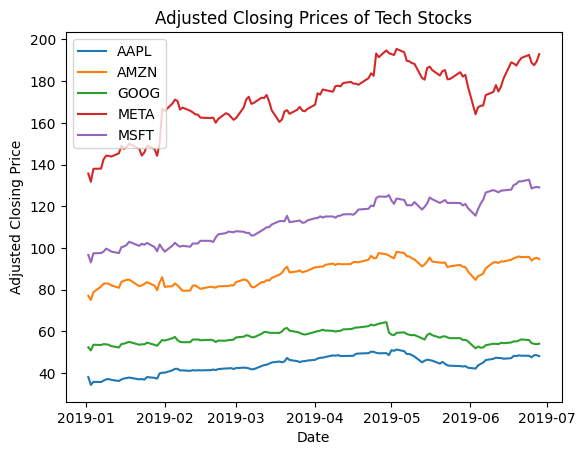

In [38]:
plt.plot(stock_data['Adj Close'])
plt.legend(symbols)
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.title('Adjusted Closing Prices of Tech Stocks')
plt.show()

### 4. Calculate and plot the daily simple rate of return over time.
Create a plot with matplotlib that shows the daily simple rate of return for each tech stock over time. Label the graph appropriately. 

                AAPL      AMZN      GOOG      META      MSFT
Date                                                        
2019-01-02       NaN       NaN       NaN       NaN       NaN
2019-01-03 -0.099607 -0.025241 -0.028484 -0.029039 -0.036788
2019-01-04  0.042689  0.050064  0.053786  0.047138  0.046509
2019-01-07 -0.002226  0.034353 -0.002167  0.000725  0.001275
2019-01-08  0.019063  0.016612  0.007385  0.032452  0.007251


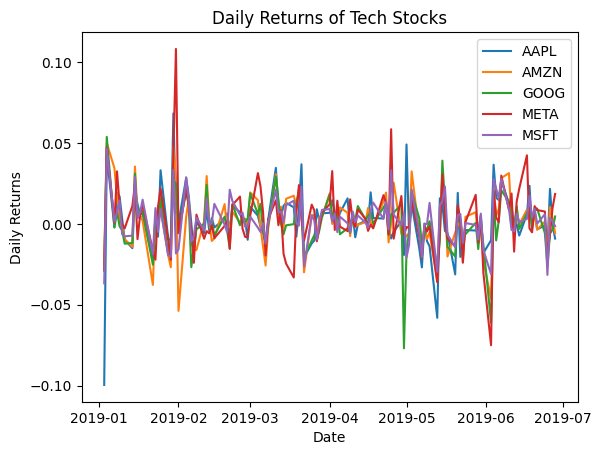

In [39]:
# Calculate the daily returns
daily_returns = stock_data['Adj Close'].pct_change()
print(daily_returns.head())

# Plot the daily returns
plt.plot(daily_returns)
plt.legend(symbols)
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Daily Returns of Tech Stocks')
plt.show()

### 5. Create subplots of daily simple rate of return.
In order to better visualize the daily returns, create a subplot for each tech stock. 

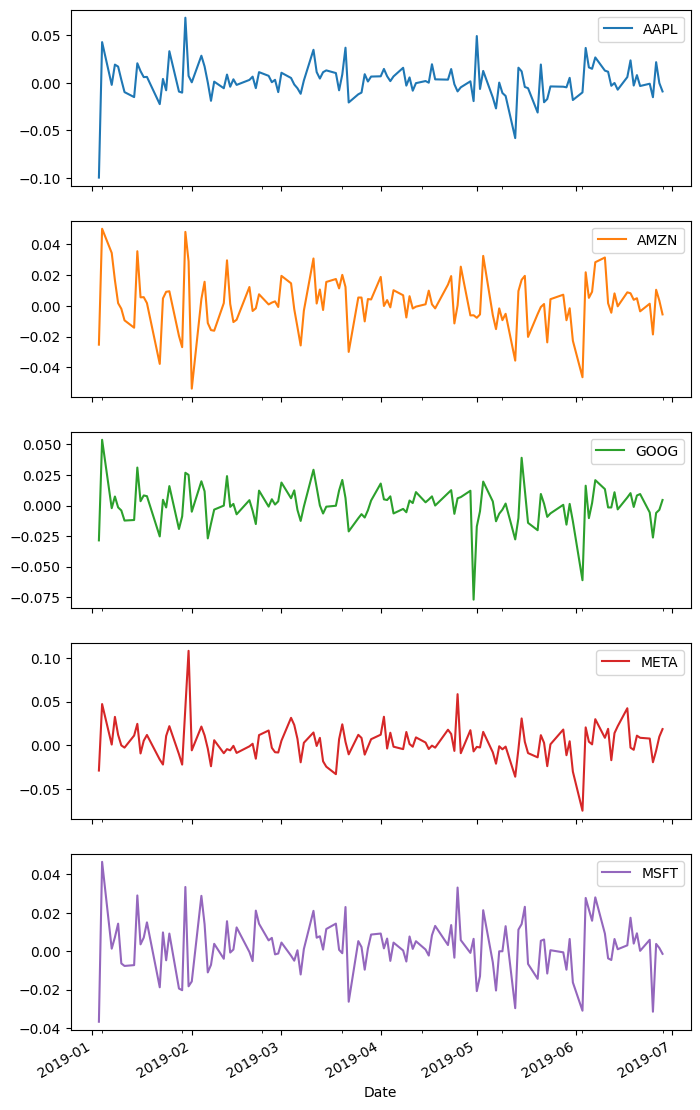

In [40]:
daily_returns.plot(subplots=True, figsize=(8,15))
plt.show()

### 6. Calculate and plot the mean of each tech stock's daily simple rate of return

#### Step 1: Calculate mean rate of return
For each stock, calculate the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use `matplotlib` to create a bar chart comparing the mean daily simple rate of return for each stock. Label the chart appropriately
#### Step 3: Analyze mean rate of return
Based on the mean rate of return, which stock would be the best option to invest in?

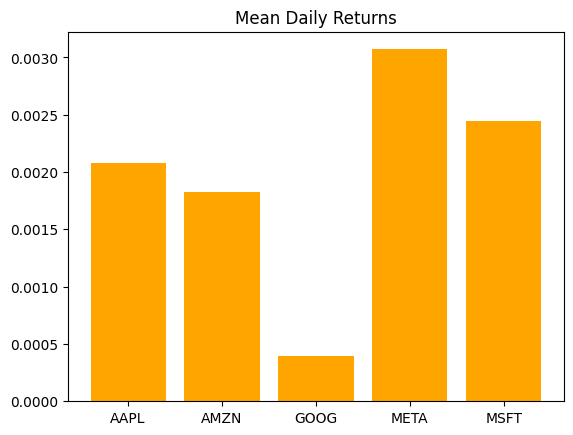

In [41]:
# calculate the mean rate of return
mean_daily_returns = daily_returns.mean()

# create a bar chart to compare the mean daily returns for each stock
# mean_daily_returns.plot(kind='bar', title='Mean Daily Returns')
plt.bar(symbols, mean_daily_returns, color='orange', align='center', width=0.8)
plt.title('Mean Daily Returns')
plt.show()

### Conclusions

Meta had the highest mean simple rate of return over this time period, closely, followed by Microsoft and Apple; thus Meta, Microsoft and Apple would have been good choices for investment over this period of time.

Google, on the other hand, has the lowest mean simple rate of return over the period.

### 7. Calculate and plot the variance.

#### Step 1: Calculate the variance
For each stock, calculate the variance of the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the variance for each stock. Label the chart appropriately
#### Step 3: Analyse the variance
Based on the variance, which stock would be the riskiest to invest in?

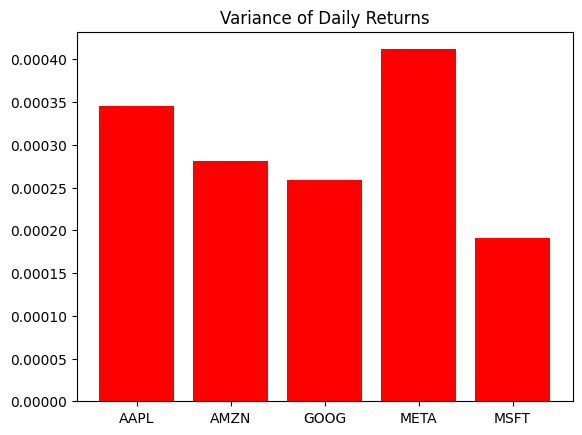

In [42]:
# calculate the variance of the daily return for each stock
var_daily_returns = daily_returns.var() # or daily_returns.var(ddof=1)

# plot the variance in a bar chart
plt.bar(symbols, var_daily_returns, color='red', align='center', width=0.8)
plt.title('Variance of Daily Returns')
plt.show()

While it had the highest return over this time period, Meta also shows the highest variance of all the stocks, indicating it can be a riskier investment.

Interestingly, Microsoft shows the lowest variance even though it had the second-highest mean rate of return, indicating that the returns are good but also relatievely predictable.

Overall, the variance of each stock generally correlates with the average rate of return, with the only exception being Microsoft.

This is in line with the conventional wisdom that higher returns often come from high risk or high volitility stocks, while lower return stocks have less volatility and therefore lower risk.

### 8. Calculate and plot the standard deviation

#### Step 1: Calculate the standard deviation
For each stock, calculate the standard deviation of the mean daily simple rate of return.

#### Step 2: Plot the bar chart
Use matplotlib to create a bar chart comparing the standard deviation of the mean daily simple rate of return of each stock. Label the chart appropriately

#### Step 3: Analyze the standard deviation
Based on the standard deviation of the rates of return, which stock would you choose to invest in and why?

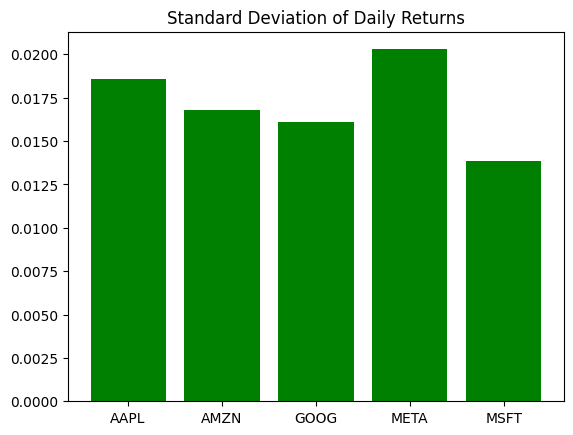

In [43]:
# calculate the standard deviation of the daily return for each stock
std_daily_returns = daily_returns.std() # or daily_returns.std(ddof=1)

# plot a bar chart of the standard deviation of the daily returns
plt.bar(symbols, std_daily_returns, color='green', align='center', width=0.8)
plt.title('Standard Deviation of Daily Returns')
plt.show()

The answer to this question depends on your investment preferences.

Meta, the most volatile stock with the highest rate of return, has the largest standard deviation. If you are an investor with a higher risk tolerance, this could be your stock of choice.

Microsoft, on the other hand, is the least volatile stock as demonstrated by the variance and standard deviation. This means that Microsoft's returns are more predictable and therefore less risky. If you are an investor with a lower risk tolerance, this could be your stock of choice.

### 9. Calculate the correlations
Calculate the correlations between each of the stocks. Which stocks are positively correlated? Which are negatively correlated? Which have little correlation?

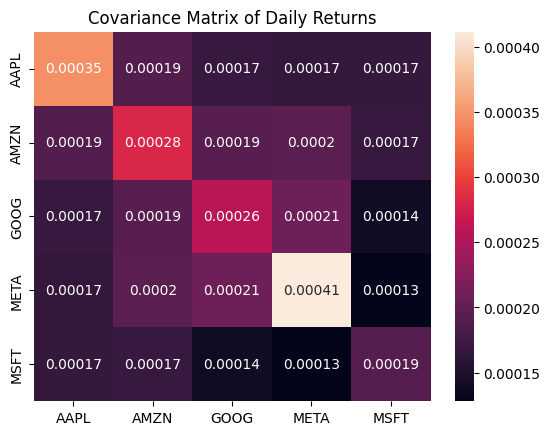

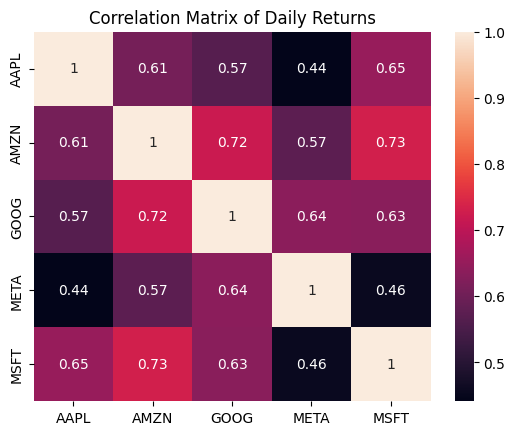

In [44]:
# create a covariance matrix of the daily returns
cov_matrix = daily_returns.cov()

# plot a heatmap of the covariance matrix using seaborn
import seaborn as sns
sns.heatmap(cov_matrix, annot=True)
plt.title('Covariance Matrix of Daily Returns')
plt.show()

# calculate the correlation matrix of the daily returns
corr_matrix = daily_returns.corr()

# plot a heatmap of the correlation matrix using seaborn
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix of Daily Returns')
plt.show()


None of the stocks are negatively correlated. This is expected, as all of the stocks are technology stocks, and therefore it is likely that the share prices and their mean rates of return move in line with eachother.

Amazon is highly correlated with Microsoft and Google, with correlation coefficients of 0.73 and 0.73, respectively; however, Microsoft and Google are only moderately correlated, with a correlation coefficient of 0.63.

Meta and Apple exhibit the lowest correlation, with a value of 0.44.

The diagonal elements of the covariance matrix contain the variances of the variables and the off-diagonal elements contain the covariances between all possible pairs of variables. In other words, the variance of a variable is the covariance of that variable with itself. This data is in line with the bar chart of the variance of mean daily returns, as shown above.